In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pickle

In [4]:
def load_artifact(targ_file:str):
    targ_path = os.path.join(dir,targ_file)

    with open(targ_path,'rb') as fp:
        test_artifact = pickle.load(fp)

    return test_artifact

In [5]:
# Each time that you initialize Dagster a new temporary folder is created.
# For the porpuse of this exercise we will save data in that temporary folder.
# Substitute tmp*** with your folder (you can fin it in this repo).
dir = "../tmpw7w4cmxn/storage/"

`core_data`

| Feature Name           | Description                                                  |
|------------------------|--------------------------------------------------------------|
| rating_account_id      | Unique identifier for the contract account                    |
| customer_id            | Unique identifier for the customer                           |
| age                    | Age of the customer                                          |
| contract_lifetime_days | Total duration of the customer contract in days              |
| remaining_binding_days | Number of days left in the contract binding period - usual binding period is 2 years        |
| has_special_offer      | Indicates if the customer has a special offer      |
| is_magenta1_customer   | Indicates if the customer is part of the Magenta1 program - fedelty program    |
| available_gb           | Amount of mobile data included in the current tariff         |
| gross_mrc              | Gross monthly recurring charge (in euros)                    |
| smartphone_brand       | Brand of the customer’s smartphone                           |
| has_done_upselling     | Whether the customer has already done an upsell in the last 3 years      |


In [6]:
core_data = load_artifact("core_data")
core_data

,rating_account_id,customer_id,age,contract_lifetime_days,remaining_binding_days,has_special_offer,is_magenta1_customer,available_gb,gross_mrc,smartphone_brand,has_done_upselling
0,182161,3.841862,37,941,418,1,1,10,66.02,iPhone,0
1,874537,5.452041,31,469,158,0,0,30,34.18,iPhone,0
2,433931,3.129000,42,274,-41,0,1,50,64.69,Samsung,0
3,283294,3.842640,44,373,157,0,1,40,58.06,iPhone,0
4,881198,1.203226,45,189,-82,1,0,0,39.49,Huawei,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,238206,5.295810,95,1754,129,1,0,50,56.73,Samsung,0
99996,542662,1.112621,86,1189,-78,0,1,0,7.65,Samsung,0
99997,946030,3.140776,89,1757,-654,0,1,0,26.22,Samsung,0
99998,827962,4.981519,96,1336,89,0,0,None,24.90,Xiaomi,0


`usage_info`

| Feature Name           | Description                                                  |
|------------------------|--------------------------------------------------------------|
| rating_account_id      | Unique identifier for the contract account                    |
| billed_period_month_d  | Billing period (monthly)                                     |
| has_used_roaming       | Indicates if roaming was used during the period            |
| used_gb                | Amount of mobile data used in the billing period (in GB)     |


In [7]:
usage_info = load_artifact("usage_info")
usage_info

,rating_account_id,billed_period_month_d,has_used_roaming,used_gb
0,182161,2024-04-01,0,0.4
1,182161,2024-05-01,0,0.4
2,182161,2024-06-01,0,0.9
3,182161,2024-07-01,0,0.6
4,874537,2024-04-01,1,0.5
...,...,...,...,...
399995,827962,2024-07-01,0,15.5
399996,317061,2024-04-01,0,51.9
399997,317061,2024-05-01,0,55.9
399998,317061,2024-06-01,1,29.4


`customer_interactions`

| Feature Name   | Description                                                              |
|----------------|--------------------------------------------------------------------------|
| customer_id    | Unique identifier for the customer                                       |
| type_subtype   | Category and subtype of the interaction (e.g., tariff change, billing)   |
| n              | Number of interactions of this type in the last 6 months                                |
| days_since_last| Number of days since the last interaction of this type                   |


In [8]:
customer_interactions = load_artifact("customer_interactions")
customer_interactions

,customer_id,type_subtype,n,days_since_last
0,5.115336,rechnungsanfragen,2,0
1,3.350983,prolongation,1,84
2,1.365630,rechnungsanfragen,2,159
3,2.722840,rechnungsanfragen,2,128
4,2.722840,produkte&services-tarifwechsel,1,61
...,...,...,...,...
63014,5.678207,rechnungsanfragen,1,32
63015,1.456900,prolongation,1,125
63016,1.456900,rechnungsanfragen,2,71
63017,5.161701,produkte&services-tarifwechsel,1,131


In [9]:
df_combined = core_data.copy()

In [10]:
df_combined = df_combined.merge(
    usage_info,
    on='rating_account_id',
    how='left'
)

In [11]:
df_combined = df_combined.merge(
    customer_interactions,
    on='customer_id',
    how='left'
)

In [12]:
df_combined

,rating_account_id,customer_id,age,contract_lifetime_days,remaining_binding_days,has_special_offer,is_magenta1_customer,available_gb,gross_mrc,smartphone_brand,has_done_upselling,billed_period_month_d,has_used_roaming,used_gb,type_subtype,n,days_since_last
0,182161,3.841862,37,941,418,1,1,10,66.02,iPhone,0,2024-04-01,0,0.4,NaN,NaN,NaN
1,182161,3.841862,37,941,418,1,1,10,66.02,iPhone,0,2024-05-01,0,0.4,NaN,NaN,NaN
2,182161,3.841862,37,941,418,1,1,10,66.02,iPhone,0,2024-06-01,0,0.9,NaN,NaN,NaN
3,182161,3.841862,37,941,418,1,1,10,66.02,iPhone,0,2024-07-01,0,0.6,NaN,NaN,NaN
4,874537,5.452041,31,469,158,0,0,30,34.18,iPhone,0,2024-04-01,1,0.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499859,827962,4.981519,96,1336,89,0,0,None,24.90,Xiaomi,0,2024-07-01,0,15.5,NaN,NaN,NaN
499860,317061,3.580423,79,1455,287,0,0,0,67.35,Samsung,0,2024-04-01,0,51.9,rechnungsanfragen,2.0,49.0
499861,317061,3.580423,79,1455,287,0,0,0,67.35,Samsung,0,2024-05-01,0,55.9,rechnungsanfragen,2.0,49.0
499862,317061,3.580423,79,1455,287,0,0,0,67.35,Samsung,0,2024-06-01,1,29.4,rechnungsanfragen,2.0,49.0


In [13]:
# Fill NaN values based on column type
df_combined['type_subtype'] = df_combined['type_subtype'].fillna('no_interaction')
df_combined['n'] = df_combined['n'].fillna(0)
df_combined['days_since_last'] = df_combined['days_since_last'].fillna(-1)

In [14]:
# Count values in has_done_upselling column
print(core_data['has_done_upselling'].value_counts())
print(f"\nPercentage distribution:")
print(core_data['has_done_upselling'].value_counts(normalize=True) * 100)

has_done_upselling
0    93231
1     6769
Name: count, dtype: int64

Percentage distribution:
has_done_upselling
0    93.231
1     6.769
Name: proportion, dtype: float64


In [15]:
df_combined.columns

Index(['rating_account_id', 'customer_id', 'age', 'contract_lifetime_days',
       'remaining_binding_days', 'has_special_offer', 'is_magenta1_customer',
       'available_gb', 'gross_mrc', 'smartphone_brand', 'has_done_upselling',
       'billed_period_month_d', 'has_used_roaming', 'used_gb', 'type_subtype',
       'n', 'days_since_last'],
      dtype='object')

In [16]:
df_combined.dtypes

rating_account_id           int64
customer_id                object
age                         int64
contract_lifetime_days      int64
remaining_binding_days      int64
has_special_offer           int64
is_magenta1_customer        int64
available_gb               object
gross_mrc                 float64
smartphone_brand           object
has_done_upselling          int64
billed_period_month_d      object
has_used_roaming            int64
used_gb                   float64
type_subtype               object
n                         float64
days_since_last           float64
dtype: object

In [17]:
df_combined = core_data

XGBOOST WITH OPTIMAL THRESHOLD SELECTION
Initial DataFrame shape: (100000, 11)

Column types:
rating_account_id           int64
customer_id                object
age                         int64
contract_lifetime_days      int64
remaining_binding_days      int64
has_special_offer           int64
is_magenta1_customer        int64
available_gb               object
gross_mrc                 float64
smartphone_brand           object
has_done_upselling          int64
dtype: object

Creating dummy variables for: ['smartphone_brand']

Final DataFrame shape after encoding: (100000, 12)

Class distribution:
Class 0: 93231 (93.23%)
Class 1: 6769 (6.77%)
Scale pos weight: 13.77

Data splits:
Training set:   (60000, 11)
Validation set: (20000, 11)
Test set:       (20000, 11)

FINDING OPTIMAL THRESHOLD
Training model for threshold optimization...

Optimal threshold (based on weighted F1): 0.740

Performance at Different Thresholds:
------------------------------------------------------------------

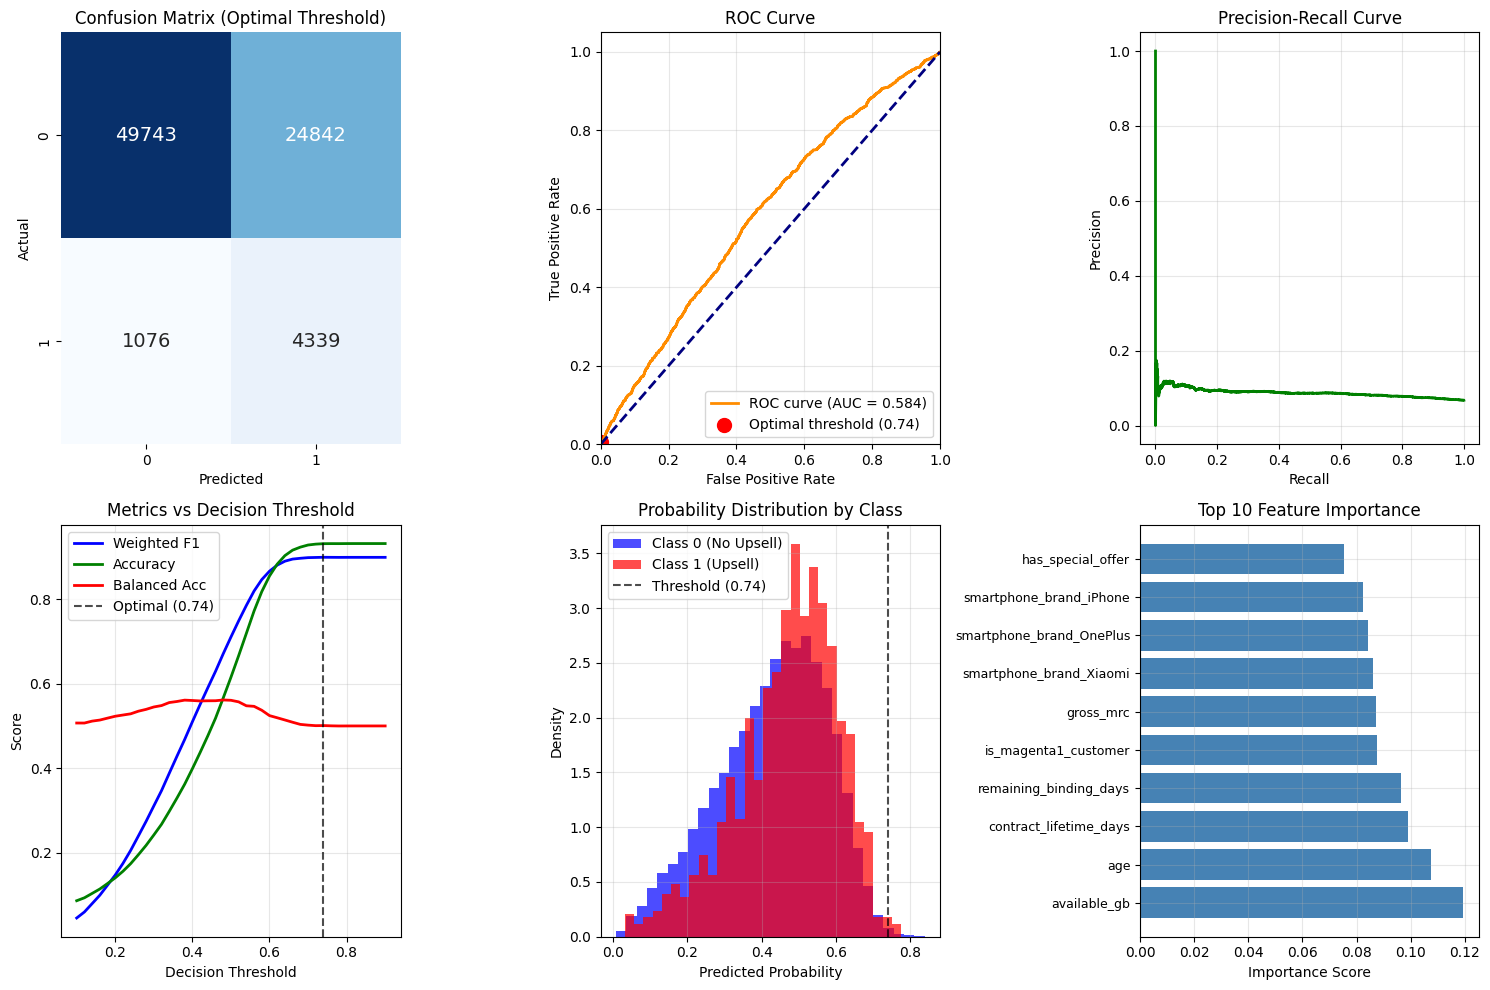


ANALYSIS COMPLETE

Final model trained with optimal threshold: 0.740
The model has been optimized to balance performance across both classes.
Check visualizations for detailed performance analysis.


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                           roc_curve, accuracy_score, precision_recall_curve,
                           f1_score, precision_score, recall_score)
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Assuming df_combined is already loaded
# df_combined = your_combined_dataframe

def prepare_data_for_classification(df_combined, target_column='has_done_upselling'):
    """
    Prepare the data for classification by creating dummy variables
    and handling missing values.
    """
    
    # Create a copy to avoid modifying the original dataframe
    df = df_combined.copy()
    
    # Print initial info
    print("Initial DataFrame shape:", df.shape)
    print("\nColumn types:")
    print(df.dtypes)
    
    # Handle missing values in numeric columns
    numeric_columns = ['age', 'contract_lifetime_days', 'remaining_binding_days', 
                       'has_special_offer', 'is_magenta1_customer']
                    #    , 'has_used_roaming', 
                    #    'used_gb', 'n', 'days_since_last', 'gross_mrc']
    
    for col in numeric_columns:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())
    
    # Handle available_gb - convert to numeric, treating 'None' or NaN as 0
    if 'available_gb' in df.columns:
        df['available_gb'] = pd.to_numeric(df['available_gb'], errors='coerce').fillna(0)
    
    # Create dummy variables for categorical columns
    categorical_columns = ['smartphone_brand' ] #, 'type_subtype', 'billed_period_month_d']
    
    # Filter to only include categorical columns that exist in the dataframe
    categorical_columns = [col for col in categorical_columns if col in df.columns]
    
    print(f"\nCreating dummy variables for: {categorical_columns}")
    
    # Create dummy variables (drop_first=True to avoid multicollinearity)
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)
    
    # Drop non-numeric columns that we don't need
    columns_to_drop = ['rating_account_id', 'customer_id']
    columns_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]
    df_encoded = df_encoded.drop(columns=columns_to_drop)
    
    print(f"\nFinal DataFrame shape after encoding: {df_encoded.shape}")
    
    return df_encoded

def find_optimal_threshold(X_train, y_train, X_val, y_val, scale_pos_weight, random_state=42):
    """
    Train a model on training data and find optimal threshold using validation set.
    """
    
    print("\n" + "="*60)
    print("FINDING OPTIMAL THRESHOLD")
    print("="*60)
    
    # Train model on training data
    print("Training model for threshold optimization...")
    model = XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        objective='binary:logistic',
        scale_pos_weight=scale_pos_weight,
        random_state=random_state,
        eval_metric='logloss',
        use_label_encoder=False
    )
    
    model.fit(X_train, y_train, verbose=False)
    
    # Get predictions on validation set
    y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Test different thresholds
    thresholds = np.linspace(0.1, 0.9, 41)
    results = []
    
    for threshold in thresholds:
        y_pred = (y_val_pred_proba >= threshold).astype(int)
        
        # Calculate metrics
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        
        accuracy = accuracy_score(y_val, y_pred)
        precision_0 = tn / (tn + fn) if (tn + fn) > 0 else 0
        precision_1 = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall_0 = tn / (tn + fp) if (tn + fp) > 0 else 0
        recall_1 = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0
        f1_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0
        
        # Weighted F1 score (by class support)
        n_class_0 = tn + fp
        n_class_1 = fn + tp
        weighted_f1 = (f1_0 * n_class_0 + f1_1 * n_class_1) / (n_class_0 + n_class_1)
        
        # Balanced accuracy
        balanced_acc = (recall_0 + recall_1) / 2
        
        results.append({
            'threshold': threshold,
            'accuracy': accuracy,
            'balanced_accuracy': balanced_acc,
            'weighted_f1': weighted_f1,
            'f1_macro': (f1_0 + f1_1) / 2,
            'recall_0': recall_0,
            'recall_1': recall_1,
            'precision_0': precision_0,
            'precision_1': precision_1
        })
    
    results_df = pd.DataFrame(results)
    
    # Find optimal threshold based on weighted F1 score
    optimal_idx = results_df['weighted_f1'].idxmax()
    optimal_threshold = results_df.iloc[optimal_idx]['threshold']
    
    print(f"\nOptimal threshold (based on weighted F1): {optimal_threshold:.3f}")
    
    # Show performance at different thresholds
    print("\nPerformance at Different Thresholds:")
    print("-" * 90)
    print(f"{'Threshold':<10} {'Accuracy':<10} {'Balanced':<10} {'F1-Weighted':<12} {'Recall-0':<10} {'Recall-1':<10}")
    print("-" * 90)
    
    for idx in [0, 10, 20, optimal_idx, 30, 40]:
        row = results_df.iloc[idx]
        print(f"{row['threshold']:<10.2f} {row['accuracy']:<10.3f} {row['balanced_accuracy']:<10.3f} "
              f"{row['weighted_f1']:<12.3f} {row['recall_0']:<10.3f} {row['recall_1']:<10.3f}")
    
    print("-" * 90)
    
    # Show optimal threshold performance
    optimal_row = results_df.iloc[optimal_idx]
    print(f"\nOptimal Threshold Performance:")
    print(f"  Accuracy:          {optimal_row['accuracy']:.4f}")
    print(f"  Balanced Accuracy: {optimal_row['balanced_accuracy']:.4f}")
    print(f"  Weighted F1:       {optimal_row['weighted_f1']:.4f}")
    print(f"  Recall Class 0:    {optimal_row['recall_0']:.4f}")
    print(f"  Recall Class 1:    {optimal_row['recall_1']:.4f}")
    
    return optimal_threshold, results_df

def train_final_model(X_train_full, y_train_full, X_test, y_test, optimal_threshold, 
                     scale_pos_weight, random_state=42):
    """
    Train final model on full training data and evaluate with optimal threshold.
    """
    
    print("\n" + "="*60)
    print("TRAINING FINAL MODEL WITH OPTIMAL THRESHOLD")
    print("="*60)
    
    # Train final model on full training data
    print("Training final XGBoost model on full training set...")
    final_model = XGBClassifier(
        n_estimators=150,  # Slightly more trees for final model
        max_depth=6,
        learning_rate=0.1,
        objective='binary:logistic',
        scale_pos_weight=scale_pos_weight,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=random_state,
        eval_metric='logloss',
        use_label_encoder=False
    )
    
    final_model.fit(
        X_train_full, y_train_full,
        eval_set=[(X_test, y_test)],
        verbose=False
    )
    
    y_train_pred = final_model.predict(X_train_full)  # Default threshold (0.5)
    # Get predictions with optimal threshold
    y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]
    y_test_pred_default = final_model.predict(X_test)  # Default threshold (0.5)
    y_test_pred_optimal = (y_test_pred_proba >= optimal_threshold).astype(int)  # Optimal threshold
    
    print(f"\nApplying optimal threshold: {optimal_threshold:.3f}")
    
    # Compare default vs optimal threshold
    print("\n" + "="*60)
    print("COMPARISON: DEFAULT (0.5) vs OPTIMAL THRESHOLD")
    print("="*60)
    
    print("\nDefault Threshold (0.5) Performance:")
    print("-" * 40)
    print(classification_report(y_test, y_test_pred_default))
    cm_default = confusion_matrix(y_test, y_test_pred_default)
    print("Confusion Matrix:")
    print(cm_default)
    
    print("\n" + "="*60)
    print(f"Optimal Threshold ({optimal_threshold:.3f}) Performance:")
    print("-" * 40)
    print(classification_report(y_test, y_test_pred_optimal))
    cm_optimal = confusion_matrix(y_test, y_test_pred_optimal)
    print("Confusion Matrix:")
    print(cm_optimal)
    
    # Calculate improvements
    tn_d, fp_d, fn_d, tp_d = cm_default.ravel()
    tn_o, fp_o, fn_o, tp_o = cm_optimal.ravel()
    
    print("\n" + "="*60)
    print("IMPROVEMENT ANALYSIS")
    print("="*60)
    
    recall_0_default = tn_d / (tn_d + fp_d)
    recall_0_optimal = tn_o / (tn_o + fp_o)
    recall_1_default = tp_d / (tp_d + fn_d)
    recall_1_optimal = tp_o / (tp_o + fn_o)
    
    print(f"Recall Class 0: {recall_0_default:.4f} → {recall_0_optimal:.4f} (Δ: {recall_0_optimal - recall_0_default:+.4f})")
    print(f"Recall Class 1: {recall_1_default:.4f} → {recall_1_optimal:.4f} (Δ: {recall_1_optimal - recall_1_default:+.4f})")
    
    acc_default = accuracy_score(y_test, y_test_pred_default)
    acc_optimal = accuracy_score(y_test, y_test_pred_optimal)
    print(f"Accuracy: {acc_default:.4f} → {acc_optimal:.4f} (Δ: {acc_optimal - acc_default:+.4f})")
    
    # ROC AUC (same for both since it's threshold-independent)
    roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train_full.columns,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 15 Most Important Features:")
    print(feature_importance.head(15).to_string(index=False))
    
    return final_model, y_test_pred_optimal, y_test_pred_proba, feature_importance, y_train_pred

def create_model_visualizations(y_test, y_test_pred, y_test_pred_proba, 
                               feature_importance, y_train_pred, optimal_threshold, results_df):
    """
    Create visualizations for model evaluation.
    """
    
    fig = plt.figure(figsize=(15, 10))
    
    # 1. Confusion Matrix
    ax1 = plt.subplot(2, 3, 1)
    cm = confusion_matrix(y_train_full, y_train_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1, cbar=False,
                annot_kws={'size': 14})
    ax1.set_title('Confusion Matrix (Optimal Threshold)', fontsize=12)
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    
    # 2. ROC Curve
    ax2 = plt.subplot(2, 3, 2)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # Mark optimal threshold point
    optimal_idx = np.argmin(np.abs(thresholds - optimal_threshold))
    ax2.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', s=100, 
               label=f'Optimal threshold ({optimal_threshold:.2f})')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve', fontsize=12)
    ax2.legend(loc="lower right")
    ax2.grid(True, alpha=0.3)
    
    # 3. Precision-Recall Curve
    ax3 = plt.subplot(2, 3, 3)
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_test_pred_proba)
    ax3.plot(recall, precision, color='green', lw=2)
    ax3.set_xlabel('Recall')
    ax3.set_ylabel('Precision')
    ax3.set_title('Precision-Recall Curve', fontsize=12)
    ax3.grid(True, alpha=0.3)
    
    # 4. Threshold vs Metrics
    ax4 = plt.subplot(2, 3, 4)
    ax4.plot(results_df['threshold'], results_df['weighted_f1'], 'b-', label='Weighted F1', lw=2)
    ax4.plot(results_df['threshold'], results_df['accuracy'], 'g-', label='Accuracy', lw=2)
    ax4.plot(results_df['threshold'], results_df['balanced_accuracy'], 'r-', label='Balanced Acc', lw=2)
    ax4.axvline(x=optimal_threshold, color='black', linestyle='--', alpha=0.7, 
               label=f'Optimal ({optimal_threshold:.2f})')
    ax4.set_xlabel('Decision Threshold')
    ax4.set_ylabel('Score')
    ax4.set_title('Metrics vs Decision Threshold', fontsize=12)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Probability Distribution
    ax5 = plt.subplot(2, 3, 5)
    ax5.hist(y_test_pred_proba[y_test == 0], bins=30, alpha=0.7, 
             label='Class 0 (No Upsell)', color='blue', density=True)
    ax5.hist(y_test_pred_proba[y_test == 1], bins=30, alpha=0.7, 
             label='Class 1 (Upsell)', color='red', density=True)
    ax5.axvline(x=optimal_threshold, color='black', linestyle='--', alpha=0.7,
               label=f'Threshold ({optimal_threshold:.2f})')
    ax5.set_xlabel('Predicted Probability')
    ax5.set_ylabel('Density')
    ax5.set_title('Probability Distribution by Class', fontsize=12)
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # 6. Feature Importance
    ax6 = plt.subplot(2, 3, 6)
    top_features = feature_importance.head(10)
    ax6.barh(range(len(top_features)), top_features['importance'].values, color='steelblue')
    ax6.set_yticks(range(len(top_features)))
    ax6.set_yticklabels(top_features['feature'].values, fontsize=9)
    ax6.set_xlabel('Importance Score')
    ax6.set_title('Top 10 Feature Importance', fontsize=12)
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Example usage:
    # Assuming df_combined is already loaded
    
    print("="*60)
    print("XGBOOST WITH OPTIMAL THRESHOLD SELECTION")
    print("="*60)
    
    # Step 1: Prepare data
    df_encoded = prepare_data_for_classification(df_combined, target_column='has_done_upselling')
    
    # Step 2: Split data
    X = df_encoded.drop(columns=['has_done_upselling'])
    y = df_encoded['has_done_upselling']
    
    # Calculate scale_pos_weight
    class_counts = y.value_counts()
    scale_pos_weight = class_counts[0] / class_counts[1]
    print(f"\nClass distribution:")
    print(f"Class 0: {class_counts[0]} ({class_counts[0]/len(y):.2%})")
    print(f"Class 1: {class_counts[1]} ({class_counts[1]/len(y):.2%})")
    print(f"Scale pos weight: {scale_pos_weight:.2f}")
    
    # Create train/validation/test split (60/20/20)
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  # 0.25 * 0.8 = 0.2
    )
    
    print(f"\nData splits:")
    print(f"Training set:   {X_train.shape}")
    print(f"Validation set: {X_val.shape}")
    print(f"Test set:       {X_test.shape}")
    
    # Step 3: Find optimal threshold using validation set
    optimal_threshold, results_df = find_optimal_threshold(
        X_train, y_train, X_val, y_val, 
        scale_pos_weight=scale_pos_weight,
        random_state=42
    )
    
    # Step 4: Train final model on train+validation and evaluate on test with optimal threshold
    # Combine train and validation for final training
    X_train_full = pd.concat([X_train, X_val])
    y_train_full = pd.concat([y_train, y_val])
    
    final_model, y_test_pred, y_test_pred_proba, feature_importance, y_train_pred = train_final_model(
        X_train_full, y_train_full, X_test, y_test,
        optimal_threshold=optimal_threshold,
        scale_pos_weight=scale_pos_weight,
        random_state=42
    )
    
    # Step 5: Create visualizations
    create_model_visualizations(
        y_test, y_test_pred, y_test_pred_proba,
        feature_importance, y_train_pred, optimal_threshold, results_df
    )
    
    print("\n" + "="*60)
    print("ANALYSIS COMPLETE")
    print("="*60)
    print(f"\nFinal model trained with optimal threshold: {optimal_threshold:.3f}")
    print("The model has been optimized to balance performance across both classes.")
    print("Check visualizations for detailed performance analysis.")